    Volume of alkali added (ml)     pH
0                           0.0   2.64
1                           1.0   2.70
2                           2.2   2.76
3                           3.1   2.81
4                           4.1   2.90
5                           5.2   3.00
6                           6.1   3.10
7                           7.2   3.26
8                           8.2   3.47
9                           9.2   3.89
10                         10.2   5.75
11                         11.2   6.45
12                         12.2   6.74
13                         13.2   6.96
14                         14.2   7.14
15                         15.2   7.32
16                         16.2   7.51
17                         17.2   7.69
18                         18.3   7.96
19                         19.2   8.35
20                         20.2  10.22
21                         21.2  11.02


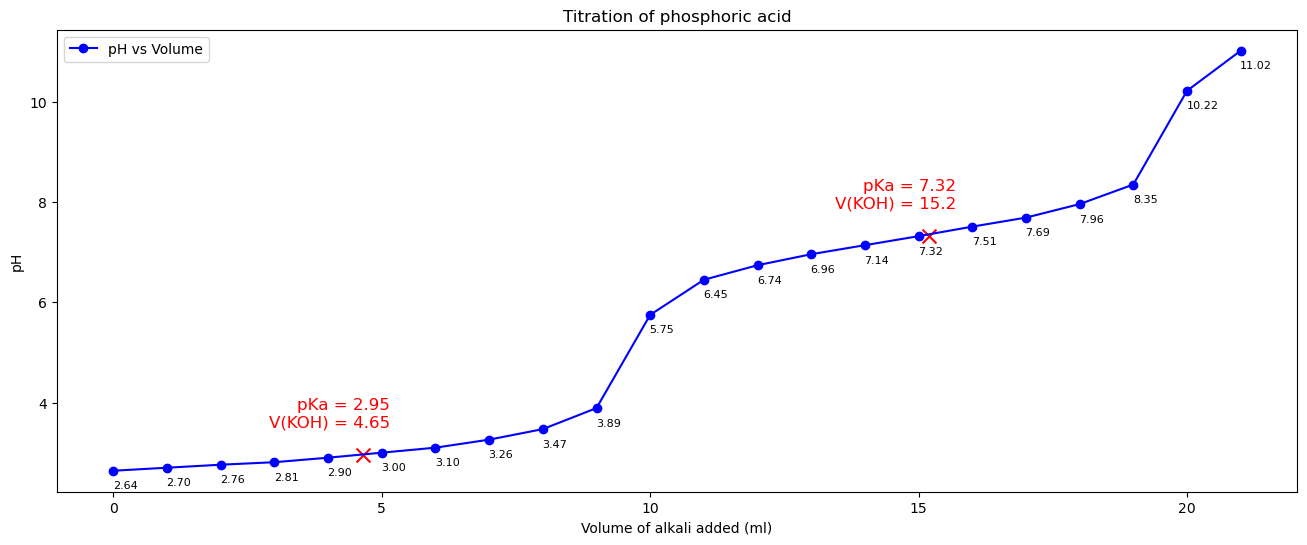

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
# from reportlab.lib.pagesizes import letter
# from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
# from reportlab.lib import colors

file_path = r'C:\Users\golov\OneDrive - Imperial College London\Year 1\Lab Reports\pH and Buffers'
def save_plot(plot, file_path, plot_name):
    file_name = f'{plot_name}.png'
    full_path = f'{file_path}/{file_name}'
    plot.savefig(full_path)

def save_dataframe(dataframe, file_path, xlsx_name):
    file_name = f'{xlsx_name}.xlsx'
    full_path = f'{file_path}/{file_name}'
    dataframe.to_excel(full_path, index = False)


data_phosphoric = {
    'Volume of alkali added (ml)': [0.00, 1.00, 2.20, 3.10, 4.10, 5.20, 6.10, 7.20, 8.20, 9.20, 10.20, 11.20, 
                                      12.20, 13.20, 14.20, 15.20, 16.20, 17.20, 18.30, 19.20, 20.20, 21.20],
    'pH': [2.64, 2.70, 2.76, 2.81, 2.90, 3.00, 3.10, 3.26, 3.47, 3.89, 5.75, 6.45, 6.74, 6.96, 7.14, 
           7.32, 7.51, 7.69, 7.96, 8.35, 10.22, 11.02]
}

# Creating DataFrame
df = pd.DataFrame(data_phosphoric)
print(df)
# xlsx_name = 'phosphoric_volume'
# save_dataframe(df, file_path, xlsx_name)

## Calculating slope for finding plateu regions
df['det(pH)'] = df['pH'].diff()

# Finding buffer regios
buffer_region_1 = df[(abs(df['det(pH)']) < 0.3) & (df.index < 10)]
buffer_region_2 = df[(abs(df['det(pH)']) < 0.3) & (df.index > 10)]

#Finding when ph=pka with medians  
buffer_best = []
buffer_best.append((buffer_region_1['Volume of alkali added (ml)'].median(), buffer_region_1['pH'].median()))
buffer_best.append((buffer_region_2['Volume of alkali added (ml)'].median(), buffer_region_2['pH'].median()))

### plotting 
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['pH'], marker='o', color='b', label='pH')

for point in buffer_best:
    plt.scatter(point[0], point[1], color='red', marker='x', s = 100)
    plt.text(point[0] + 0.5, point[1] + 0.5, f'pKa = {point[1]}\nV(KOH) = {point[0]}',
         ha='right', va='bottom', color='red', fontsize=12)



for index, row in df.iterrows():
    plt.text(index - 0.01, row['pH'] - 0.2, f'{row["pH"]:.2f}', ha='left', va='top', color='black', fontsize=8)
plt.xlabel('Volume of alkali added (ml)')
plt.ylabel('pH')
plt.legend(['pH vs Volume'])
plt.title('Titration of phosphoric acid')
plt.grid(False)
plot_name = 'phosphoric_volume'
save_plot(plt, file_path, plot_name)

GRAPH 2 - Mole equivalent

       pH  det(pH)  Mole Equivalent
0    2.64      NaN             0.00
1    2.70     0.06             0.10
2    2.76     0.06             0.22
3    2.81     0.05             0.31
4    2.90     0.09             0.41
5    3.00     0.10             0.52
6    3.10     0.10             0.61
7    3.26     0.16             0.72
8    3.47     0.21             0.82
9    3.89     0.42             0.92
10   5.75     1.86             1.02
11   6.45     0.70             1.12
12   6.74     0.29             1.22
13   6.96     0.22             1.32
14   7.14     0.18             1.42
15   7.32     0.18             1.52
16   7.51     0.19             1.62
17   7.69     0.18             1.72
18   7.96     0.27             1.83
19   8.35     0.39             1.92
20  10.22     1.87             2.02
21  11.02     0.80             2.12


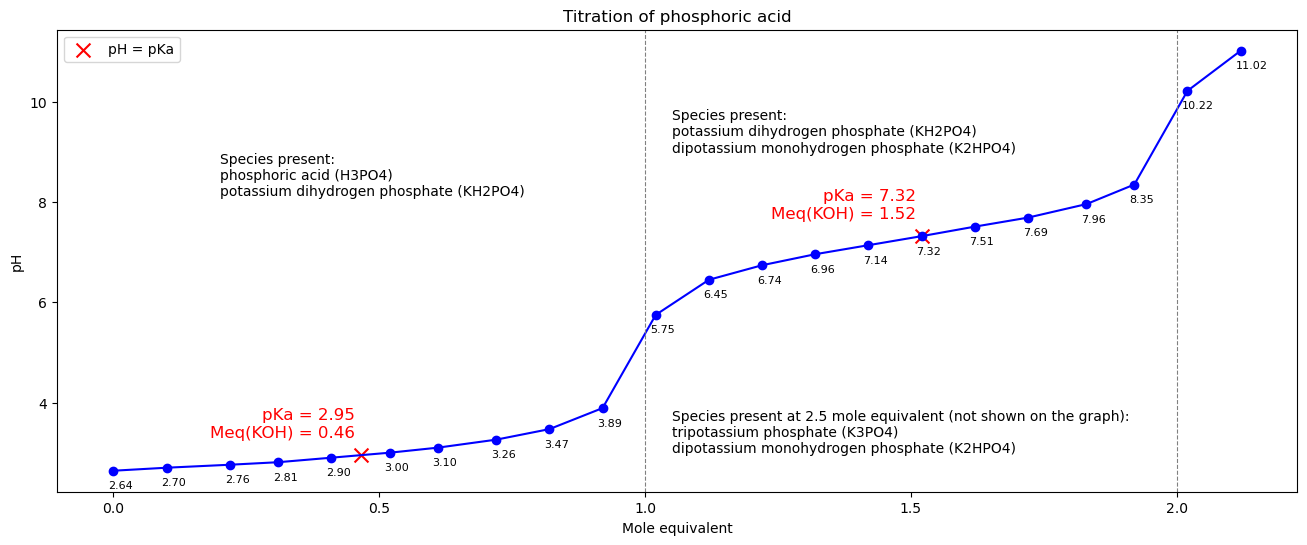

In [251]:

# Calculating mole equivalents at every point
mole_df = df.drop(columns = 'Volume of alkali added (ml)')
mole_df['Mole Equivalent'] = df['Volume of alkali added (ml)'] * 0.2 / 1000 / (0.4 * 0.005)
print(mole_df)
# xlsx_name = 'phosphoric_mole'
# save_dataframe(mole_df, file_path, xlsx_name)

# Finding buffer regios
buffer_region_1 = mole_df[(abs(df['det(pH)']) < 0.3) & (mole_df.index < 10)]
buffer_region_2 = mole_df[(abs(df['det(pH)']) < 0.3) & (mole_df.index > 10)]

#Finding when ph=pka with medians  
buffer_best = []
buffer_best.append((buffer_region_1['Mole Equivalent'].median(), buffer_region_1['pH'].median()))
buffer_best.append((buffer_region_2['Mole Equivalent'].median(), buffer_region_2['pH'].median()))

#Plotting values with highest buffer capacity
plt.figure(figsize=(16, 6))
for point in buffer_best:
    plt.scatter(point[0], point[1], color='red', marker='x', s = 100)
    plt.text(point[0] - 0.01, point[1] + 0.3, f'pKa = {point[1]:.2f}\nMeq(KOH) = {point[0]:.2f}',
         ha='right', va='bottom', color='red', fontsize=12)

for index, row in mole_df.iterrows():
    plt.text(row['Mole Equivalent'] - 0.01, row['pH'] - 0.2, f'{row["pH"]:.2f}', ha='left', va='top', color='black', fontsize=8)

#Plotting everything else

plt.plot(mole_df['Mole Equivalent'], mole_df['pH'], marker='o', color='b', label='pH')
plt.axvline(x=1, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=2, color='gray', linestyle='--', linewidth=0.8)
plt.text(0.2,9, f'Species present:\nphosphoric acid (H3PO4)\npotassium dihydrogen phosphate (KH2PO4)', ha = 'left',va='top',color = 'black')
plt.text(1.05,9,f'Species present:\npotassium dihydrogen phosphate (KH2PO4)\ndipotassium monohydrogen phosphate (K2HPO4)', color = 'black')
plt.text(1.05, 3, f'Species present at 2.5 mole equivalent (not shown on the graph):\ntripotassium phosphate (K3PO4)\ndipotassium monohydrogen phosphate (K2HPO4)', color = 'black')
plt.xlabel('Mole equivalent')
plt.ylabel('pH')
plt.legend(['pH = pKa'])
plt.title('Titration of phosphoric acid')
plt.grid(False)
plot_name = 'phosphoric_mole'
save_plot(plt, file_path, plot_name)

GRAPH 3 - BUFFER CAPACITY

In [252]:

### Finding change in pH at every point (numerically using built-in python function)
mole_df['det(pH)'] = mole_df['pH'].diff()

#Finding change in mole equivalent at every point 
mole_df['det(m)'] = mole_df['Mole Equivalent'].diff()

#Finding slope
mole_df['Gradient'] = mole_df['det(pH)'] / mole_df['det(m)']
print(mole_df)
# xlsx_name = 'phosphoric_capacity'
# save_dataframe(mole_df, file_path, xlsx_name)






       pH  det(pH)  Mole Equivalent  det(m)   Gradient
0    2.64      NaN             0.00     NaN        NaN
1    2.70     0.06             0.10    0.10   0.600000
2    2.76     0.06             0.22    0.12   0.500000
3    2.81     0.05             0.31    0.09   0.555556
4    2.90     0.09             0.41    0.10   0.900000
5    3.00     0.10             0.52    0.11   0.909091
6    3.10     0.10             0.61    0.09   1.111111
7    3.26     0.16             0.72    0.11   1.454545
8    3.47     0.21             0.82    0.10   2.100000
9    3.89     0.42             0.92    0.10   4.200000
10   5.75     1.86             1.02    0.10  18.600000
11   6.45     0.70             1.12    0.10   7.000000
12   6.74     0.29             1.22    0.10   2.900000
13   6.96     0.22             1.32    0.10   2.200000
14   7.14     0.18             1.42    0.10   1.800000
15   7.32     0.18             1.52    0.10   1.800000
16   7.51     0.19             1.62    0.10   1.900000
17   7.69 

Finding minima values, where buffer capacity is maximum

In [253]:


buffer_region_1 = mole_df[(abs(df['det(pH)']) < 0.3) & (mole_df.index < 10)]
buffer_region_2 = mole_df[(abs(df['det(pH)']) < 0.3) & (mole_df.index > 10)]
buffer_best = []
min_gradient_1_index = buffer_region_1['Gradient'].idxmin()
buffer_best.append((buffer_region_1.loc[min_gradient_1_index, 'Gradient'], buffer_region_1.loc[min_gradient_1_index, 'pH']))

min_gradient_2_index = buffer_region_2['Gradient'].idxmin()
buffer_best.append((buffer_region_2.loc[min_gradient_2_index, 'Gradient'], buffer_region_2.loc[min_gradient_2_index, 'pH']))


Plot of graph 3

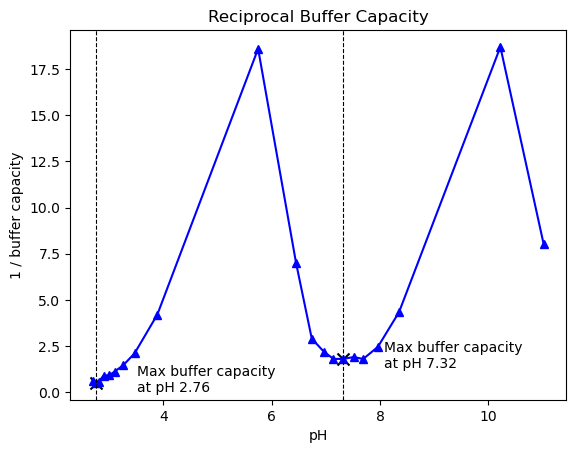

In [254]:

plt.plot(mole_df['pH'], mole_df['Gradient'], marker = '^', color = 'b', label = 'Buffer capacity')
for point in buffer_best:
    plt.scatter(point[1], point[0], color = 'black', s = 75, marker = 'x')
    plt.axvline(x = point[1], linestyle = '--', color = 'black', linewidth = 0.8)
    plt.text(point[1] + 0.75, point[0] - 0.5, f'Max buffer capacity\nat pH {point[1]:.2f}')
plt.xlabel('pH')
plt.ylabel('1 / buffer capacity')
plt.title('Reciprocal Buffer Capacity')
plt.grid(False)
plot_name = 'phosphoric_capacity'
save_plot(plt, file_path, plot_name)
plt.show()

GRAPH 4 - Titration of Alanine 

In [255]:
### Creating dataframes

data_alanine_base = {
    'Volume of alkali added (ml)': [0.00, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.85, 1, 1.1, 1.2, 
                                      1.35, 2.2, 3.4, 4.4, 5.5, 6.5, 7.7, 8.7, 9.7, 10.9, 12, 13.1, 14, 15, 16, 18.1, 19.2, 20.3, 21.5, 22.5, 23.5, 24.5, 25.5],
    'pH': [6.56, 7.86, 8.17, 8.35, 8.48, 8.60, 8.69, 8.75, 8.81, 8.86, 8.91, 8.96, 9, 9.22, 9.41, 9.53,
           9.66, 9.74, 9.85, 9.91, 10, 10.06, 10.15, 10.2, 10.25, 10.32, 10.37, 10.48, 10.56, 10.62, 10.7, 10.8, 10.87, 10.95, 11.08]
}

data_alanine_acid = {
    'Volume of acid added (ml)': [0.00, 0.1, 0.2, 0.3, 0.4, 0.9, 1.4, 1.9, 2.4, 2.9, 3.4, 3.9, 
                                      4.4, 5, 5.5, 6, 6.5, 7, 8.3, 9.3, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    'pH': [6.56, 5.04, 4.72, 4.54, 4.40, 4.05, 3.84, 3.69, 3.56, 3.47, 3.39, 3.33, 3.26, 3.2, 3.15, 
           3.1, 3.06, 3.02, 2.92, 2.86, 2.80, 2.75, 2.69, 2.63, 2.56, 2.52, 2.47, 2.42, 2.37, 2.32, 2.28, 2.23, 2.18, 2.15, 2.10, 2.07, 2.03, 2]
}

base = pd.DataFrame(data_alanine_base)
acid = pd.DataFrame(data_alanine_acid)
print(base)
print(acid)
base['Mole Equivalent'] = base['Volume of alkali added (ml)'] * 0.2 / 1000 / (0.1 * 0.05)
acid['Mole Equivalent'] = acid['Volume of acid added (ml)'] * 0.2 / 1000 / (0.1 * 0.05)

# xlsx_name = 'alanine_base'
# save_dataframe(base, file_path, xlsx_name)
# xlsx_name = 'alanine_acid'
# save_dataframe(acid, file_path, xlsx_name)

    Volume of alkali added (ml)     pH
0                          0.00   6.56
1                          0.10   7.86
2                          0.20   8.17
3                          0.30   8.35
4                          0.40   8.48
5                          0.50   8.60
6                          0.60   8.69
7                          0.75   8.75
8                          0.85   8.81
9                          1.00   8.86
10                         1.10   8.91
11                         1.20   8.96
12                         1.35   9.00
13                         2.20   9.22
14                         3.40   9.41
15                         4.40   9.53
16                         5.50   9.66
17                         6.50   9.74
18                         7.70   9.85
19                         8.70   9.91
20                         9.70  10.00
21                        10.90  10.06
22                        12.00  10.15
23                        13.10  10.20
24                       

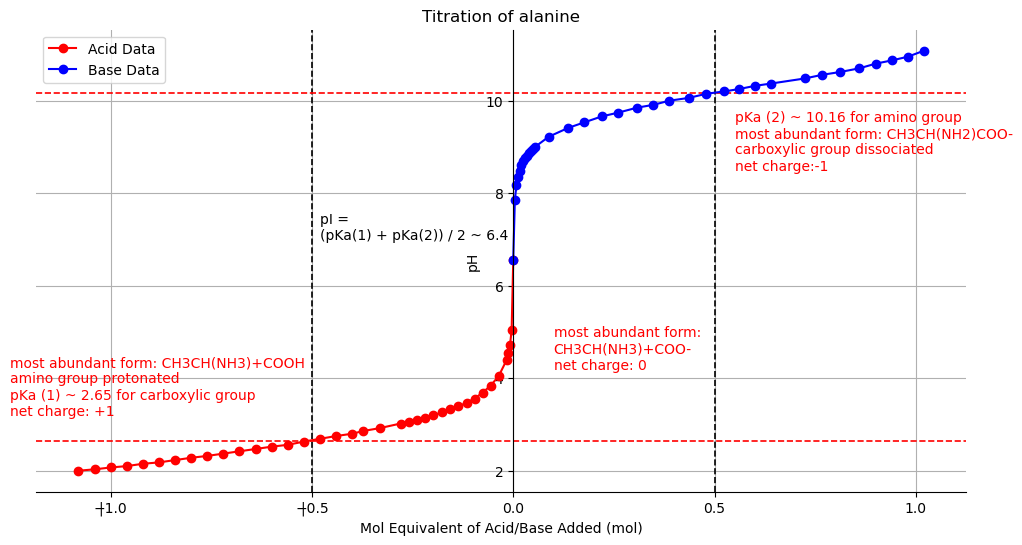

In [256]:
###Plotting

acid_inverted = acid[::-1]
plt.figure(figsize=(12, 6))
plt.plot(-acid_inverted['Mole Equivalent'], acid_inverted['pH'], marker='o', color='r', label='Acid Data')

plt.text(-0.53, 1.1, f'|', color = 'black')
plt.text(-1.03, 1.1, f'|', color = 'black')

plt.axvline(x = 0.5, linestyle = '--', color = 'black', linewidth = 1.2)
plt.axvline(x = -0.5, linestyle = '--', color = 'black', linewidth = 1.2)
plt.axhline(y = 10.16, linestyle = '--', color = 'red', linewidth = 1.2)
plt.axhline(y = 2.65, linestyle = '--', color = 'red', linewidth = 1.2)

plt.text(0.55, 8.5, f'pKa (2) ~ 10.16 for amino group\nmost abundant form: CH3CH(NH2)COO-\ncarboxylic group dissociated\nnet charge:-1', color = 'r')
plt.text(-1.25, 3.2, f'most abundant form: CH3CH(NH3)+COOH\namino group protonated\npKa (1) ~ 2.65 for carboxylic group\nnet charge: +1', color = 'r')
plt.text(0.1, 4.2, f'most abundant form:\nCH3CH(NH3)+COO-\nnet charge: 0', color = 'r')
plt.text(-0.48, 7, f'pI =\n(pKa(1) + pKa(2)) / 2 ~ 6.4')

plt.plot(base['Mole Equivalent'], base['pH'], marker='o', color='b', label='Base Data')
plt.xlabel('Mol Equivalent of Acid/Base Added (mol)')
plt.ylabel('pH')
plt.title('Titration of alanine')
plt.legend()
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.grid(True)
plot_name = 'Titration of alanine'
save_plot(plt, file_path, plot_name)


Problem 5 - Beverages

In [257]:


import pandas as pd

data = {
    'Solution': ['A', 'B', 'C', 'D', 'E'],
    'pH Measured': [3.29, 2.70, 4.71, 5.64, 8.27],
    'Indication of beverage': ['white wine', 'coca-cola', 'beer', 'coffee', 'water'],
    'Probable acids/bases present': [
        ['tartaric acid', 'malic acid', 'citric acid', 'lactic acid'],
        ['phosphoric acid', 'citric acid'],
        ['acetic acid', 'pyruvic acid'],
        ['chlorogenic acid', 'quinic acid', 'citric acid'],
        ['sodium dihydrogen phosphate', 'potassium carbonate']
    ]
}

df = pd.DataFrame(data)
print(df)



  Solution  pH Measured Indication of beverage  \
0        A         3.29             white wine   
1        B         2.70              coca-cola   
2        C         4.71                   beer   
3        D         5.64                 coffee   
4        E         8.27                  water   

                        Probable acids/bases present  
0  [tartaric acid, malic acid, citric acid, lacti...  
1                     [phosphoric acid, citric acid]  
2                        [acetic acid, pyruvic acid]  
3       [chlorogenic acid, quinic acid, citric acid]  
4  [sodium dihydrogen phosphate, potassium carbon...  
